## Feature Selection

In this notebook we do some exploratory data-analysis & try to find out what features would be optimal to use for building a 
surrogate model for predicting the transition wavelength of various photoswitches

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np

from src.utils import load_features_and_labels, plot_pca
from src.random_forest import train_rf_model
from src.gaussian_process import train_gp_model

##### We start by training a random forest model on various descriptors (rdKIT descriptors and Mordred Descriptors) & using the importance of the features assigned by the model to find out chemical knowledge about what determines which wavelengths the photoswitches adsorb

In [7]:
X, y = load_features_and_labels('./processed_data/initial_dataset/rdkit_descriptors.csv', './raw_data/photoswitches.csv', 'e_iso_pi')
model = train_rf_model(X, y)

df = pd.read_csv('./processed_data/initial_dataset/rdkit_descriptors.csv')

importances = model.feature_importances_
features = df.columns[2:]


Beginning training loop...


In [5]:
indices = np.argsort(importances)

# Most important features
print(importances[indices[-5:]])
print(features[indices[-5:]])

[0.02884777 0.03045451 0.04085768 0.04689389 0.0531676 ]
Index(['Chi4n', 'Chi2n', 'MolMR', 'PEOE_VSA1', 'Chi1n'], dtype='object')


In [6]:
indices = np.argsort(importances)

# Least important features
print(importances[indices[:5]])
print(features[indices[:5]])

[0. 0. 0. 0. 0.]
Index(['fr_urea', 'fr_imide', 'fr_hdrzone', 'fr_hdrzine', 'fr_guanido'], dtype='object')


In [3]:
smiles, X, X_p, y = load_features_and_labels('./processed_data/mordred_descriptors.csv' ,'e_iso_pi')
model = train_rf_model(X, y)

importances = model.feature_importances_
features = X_p.columns[2:]

indices = np.argsort(importances)

print('Most important features: ')
print(importances[indices[-10:]])
print(features[indices[-10:]])

print('\n')

print('Least important features: ')
print(importances[indices[:5]])
print(features[indices[:5]])


Beginning training loop...

mean R^2: 0.8613 +- 0.0073
mean RMSE: 24.5432 +- 0.9229
mean MAE: 15.5640 +- 0.5980

Most important features: 
[0.01935436 0.02033442 0.0218533  0.02248634 0.02442586 0.02643071
 0.02764758 0.03103471 0.03875837 0.04233432]
Index(['TIC5', 'ATS3d', 'GATS3s', 'ATS3pe', 'Sv', 'ATS1pe', 'TIC4', 'ATS1se',
       'ATS1are', 'ATS3se'],
      dtype='object')


Least important features: 
[0. 0. 0. 0. 0.]
Index(['NdCH2', 'n11HRing', 'n12HRing', 'nG12HRing', 'n3aRing'], dtype='object')


<BarContainer object of 1427 artists>

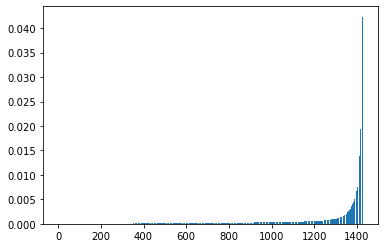

In [7]:
import matplotlib.pyplot as plt

plt.bar(np.arange(len(importances)), importances[indices])

As seen from the bar plot, only 10 descriptors already contribute the majority of importance in the RF model. When looking at those features, is stands out that 4 of the top 5 most important features are related to the electronegativity of the atoms the molecule consists of. Besides the information content of the molecule is also fairly important. The electronegativity might be important, because of the correlation between the electronegativity and the attraction of the electron cloud to the nucleus. Therefore the higher the electronegative environment of the electron receiving LUMO, the lower the transition wavelength should be in theory.

The question is if we could beat these mordred features using more clever ways of modelling the molecules, because there might be more features that are also important to the task at hand, which might be missed out on currently. Therefore we could try to teach a ML model to learn relevant features for our prediction task.

However, this because quite a complex task, since the model has to learn all these complex mathematical relationships itself, which requires more data. Therefore we would ideally train a model on a lot of molecules first & than later finetune the model for our data specifically.

### Morgan fingerprints VS. MolBERT fingerprints (PCA plots)

explained variance:  [1.00000000e+00 3.32070177e-18]


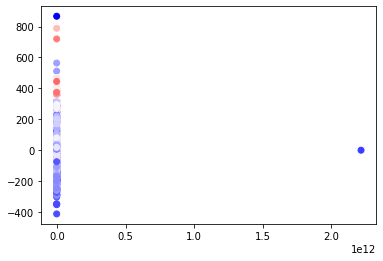

In [19]:
plot_pca('./processed_data/rdkit_descriptors.csv', 'e_iso_pi')

explained variance:  [0.82146804 0.08396492]


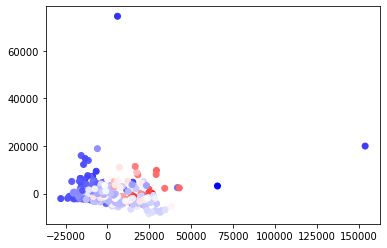

In [18]:
plot_pca('./processed_data/mordred_descriptors.csv', 'e_iso_pi')

explained variance:  [0.09402779 0.07124659]


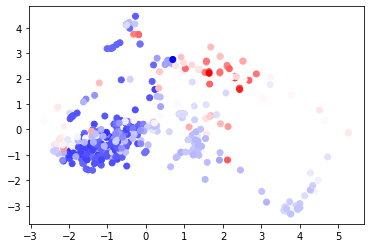

In [9]:
plot_pca('./processed_data/morgan_fingerprints.csv', 'e_iso_pi')

explained variance:  [0.20284501 0.11412435]


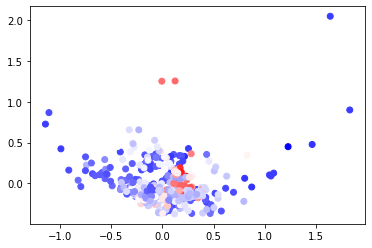

In [15]:
plot_pca('./processed_data/molbert_tuned_features.csv', 'e_iso_pi')

explained variance:  [0.14742698 0.12472223]


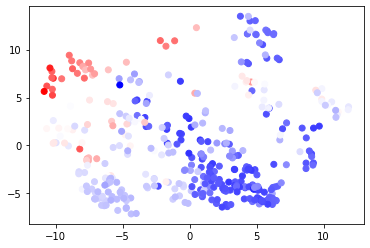

In [26]:
plot_pca('./processed_data/molbert_tuned_2_features.csv', 'e_iso_pi')

explained variance:  [0.16287411 0.15877107]


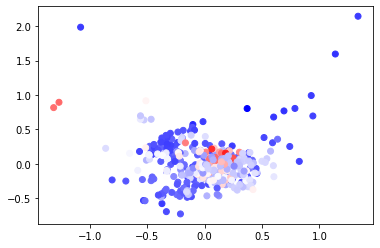

In [21]:
plot_pca('./processed_data/molbert_tuned_3_features.csv', 'e_iso_pi')

explained variance:  [0.20247498 0.14862333]


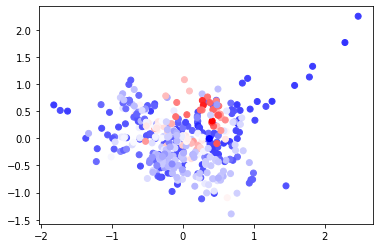

In [27]:
plot_pca('./processed_data/molbert_tuned_4_features.csv', 'e_iso_pi')

explained variance:  [0.20288507 0.11411839]


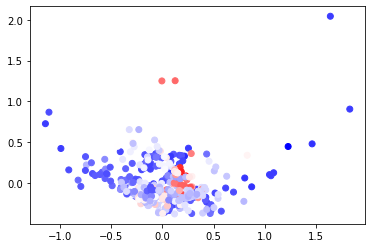

In [31]:
plot_pca('./processed_data/molbert_tuned_5_features.csv', 'e_iso_pi')

#### As can be seen in this plot making a PCA plot of the thermal isomerization rate is not very insightful as a comparison

explained variance:  [0.16140521 0.13046237]


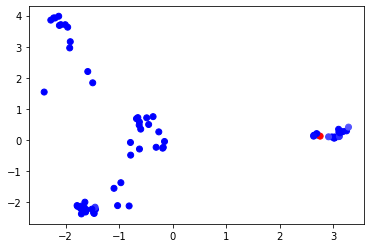

In [13]:
plot_pca('./processed_data/morgan_fingerprints.csv', 'thermal')

### Morgan fingerprints VS. MolBERT fingerprints (RF)

In [8]:
smiles, X, X_p, y = load_features_and_labels('./processed_data/morgan_fingerprints.csv' ,'e_iso_pi')
model = train_rf_model(X, y)


Beginning training loop...

mean R^2: 0.8564 +- 0.0122
mean RMSE: 24.8744 +- 1.3260
mean MAE: 15.3308 +- 0.6889



In [10]:
smiles, X, X_p, y = load_features_and_labels('./processed_data/morgan_fingerprints.csv' ,'thermal')
model = train_rf_model(X, y)


Beginning training loop...

mean R^2: -79.7137 +- 59.0215
mean RMSE: 0.0147 +- 0.0016
mean MAE: 0.0079 +- 0.0009



In [3]:
smiles, X, X_p, y = load_features_and_labels('./processed_data/molbert_tuned_features.csv' ,'e_iso_pi')
model = train_rf_model(X, y)


Beginning training loop...

mean R^2: 0.8351 +- 0.0145
mean RMSE: 26.5140 +- 1.2367
mean MAE: 18.2865 +- 0.6673



In [8]:
smiles, X, X_p, y = load_features_and_labels('./processed_data/molbert_features.csv' ,'e_iso_pi')
model = train_rf_model(X, y)


Beginning training loop...

mean R^2: 0.8687 +- 0.0110
mean RMSE: 23.7194 +- 1.1824
mean MAE: 15.6820 +- 0.6255



In [10]:
smiles, X, X_p, y = load_features_and_labels('./processed_data/molbert_tuned_features.csv' ,'thermal')
model = train_rf_model(X, y)


Beginning training loop...

mean R^2: -122.1827 +- 82.8429
mean RMSE: 0.0165 +- 0.0014
mean MAE: 0.0112 +- 0.0008



In [11]:
smiles, X, X_p, y = load_features_and_labels('./processed_data/molbert_features.csv' ,'thermal')
model = train_rf_model(X, y)


Beginning training loop...

mean R^2: -178.8552 +- 143.6350
mean RMSE: 0.0162 +- 0.0022
mean MAE: 0.0108 +- 0.0009



### Morgan fingerprints VS. MolBERT fingerprints (GP)

In [20]:
# just for reference
smiles, X, X_p, y = load_features_and_labels('./processed_data/mordred_descriptors.csv' ,'e_iso_pi')
model = train_gp_model(X, y)


Beginning training loop...

mean R^2: 0.9045 +- 0.0080
mean RMSE: 20.1811 +- 0.8257
mean MAE: 12.8562 +- 0.4907



In [3]:
smiles, X, X_p, y = load_features_and_labels('./processed_data/morgan_fingerprints.csv' ,'e_iso_pi')
model = train_gp_model(X, y)


Beginning training loop...

mean R^2: 0.8112 +- 0.0153
mean RMSE: 28.4780 +- 1.3144
mean MAE: 19.3297 +- 0.7597



In [6]:
smiles, X, X_p, y = load_features_and_labels('./processed_data/morgan_fingerprints.csv' ,'thermal')
model = train_gp_model(X, y)


Beginning training loop...

mean R^2: -44.6798 +- 27.6020
mean RMSE: 0.0126 +- 0.0010
mean MAE: 0.0082 +- 0.0007



In [5]:
smiles, X, X_p, y = load_features_and_labels('./processed_data/molbert_tuned_features.csv' ,'e_iso_pi')
model = train_gp_model(X, y)


Beginning training loop...

mean R^2: 0.8986 +- 0.0103
mean RMSE: 20.6951 +- 1.0575
mean MAE: 13.7019 +- 0.4938



In [24]:
smiles, X, X_p, y = load_features_and_labels('./processed_data/molbert_tuned_2_features.csv' ,'e_iso_pi')
model = train_gp_model(X, y)


Beginning training loop...

mean R^2: 0.8798 +- 0.0147
mean RMSE: 22.5342 +- 1.4102
mean MAE: 13.5571 +- 0.4899



In [25]:
smiles, X, X_p, y = load_features_and_labels('./processed_data/molbert_tuned_3_features.csv' ,'e_iso_pi')
model = train_gp_model(X, y)


Beginning training loop...

mean R^2: 0.8993 +- 0.0099
mean RMSE: 20.6381 +- 1.0471
mean MAE: 13.6569 +- 0.4839



In [28]:
smiles, X, X_p, y = load_features_and_labels('./processed_data/molbert_tuned_4_features.csv' ,'e_iso_pi')
model = train_gp_model(X, y)


Beginning training loop...

mean R^2: 0.8907 +- 0.0102
mean RMSE: 21.5167 +- 0.9731
mean MAE: 14.2930 +- 0.5223



In [30]:
smiles, X, X_p, y = load_features_and_labels('./processed_data/molbert_tuned_5_features.csv' ,'e_iso_pi')
model = train_gp_model(X, y)


Beginning training loop...

mean R^2: 0.8986 +- 0.0103
mean RMSE: 20.6918 +- 1.0578
mean MAE: 13.6996 +- 0.4944



### Results

We can see that the Gaussian Progress Regression model works the best, particulary in combination with the mordred descriptors but also with the MolBERT fingerprints.

In [2]:
smiles, X, X_p, y = load_features_and_labels('./processed_data/jtnn_features.csv' ,'e_iso_pi')
model = train_gp_model(X, y)


Beginning training loop...

mean R^2: 0.8601 +- 0.0144
mean RMSE: 23.8784 +- 1.4816
mean MAE: 14.8252 +- 0.6878



In [2]:
# with RBF kernel instead of tanimoto
smiles, X, X_p, y = load_features_and_labels('./processed_data/jtnn_features.csv' ,'e_iso_pi')
model = train_gp_model(X, y)


Beginning training loop...

mean R^2: 0.5168 +- 0.1336
mean RMSE: 40.7751 +- 7.0142
mean MAE: 30.7099 +- 6.2357



D:\Anaconda3\envs\molbert\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
D:\Anaconda3\envs\molbert\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

NameError: name 'load_features_and_labels' is not defined